We are using the School Finances Dataset. 

In [1]:
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('elsec15.csv')

C:\Users\brand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


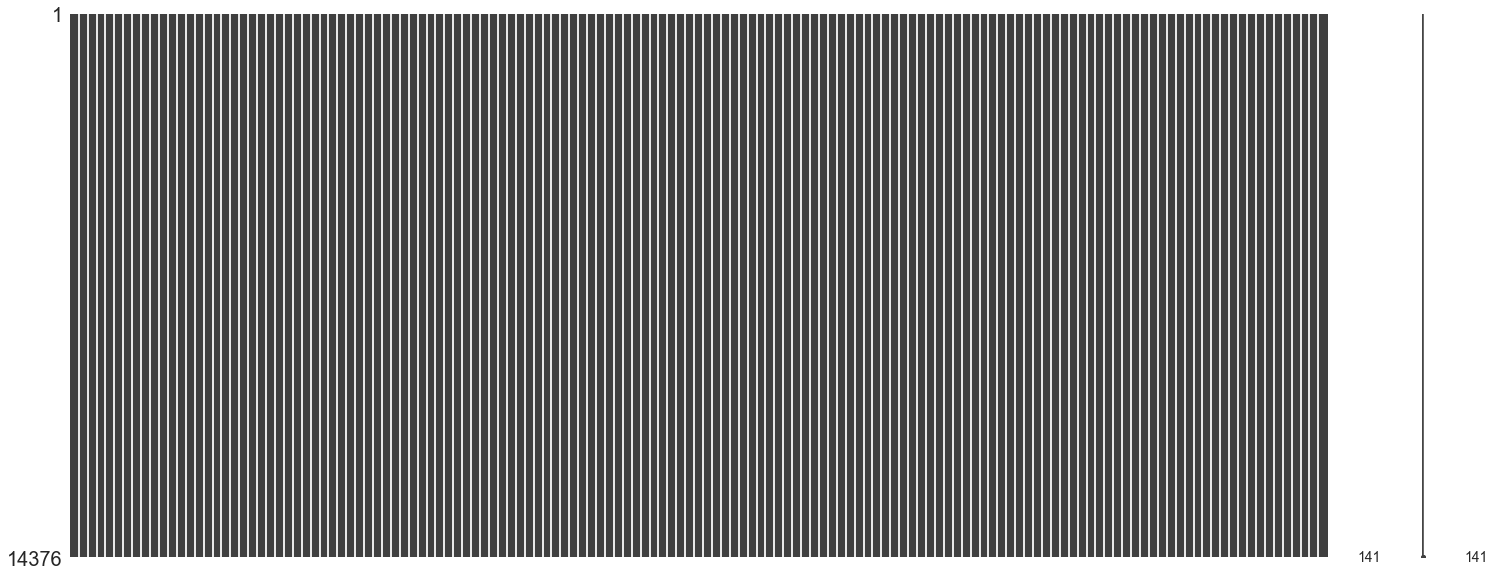

In [4]:
msno.matrix(df)

In [5]:
df.shape

(14376, 141)

In [6]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [7]:
df["CSA"].describe()

count     14376
unique      170
top           N
freq       6892
Name: CSA, dtype: object

In [8]:
df.replace(0, float("NAN"), inplace=True)
df.replace("N", float("NAN"), inplace=True)

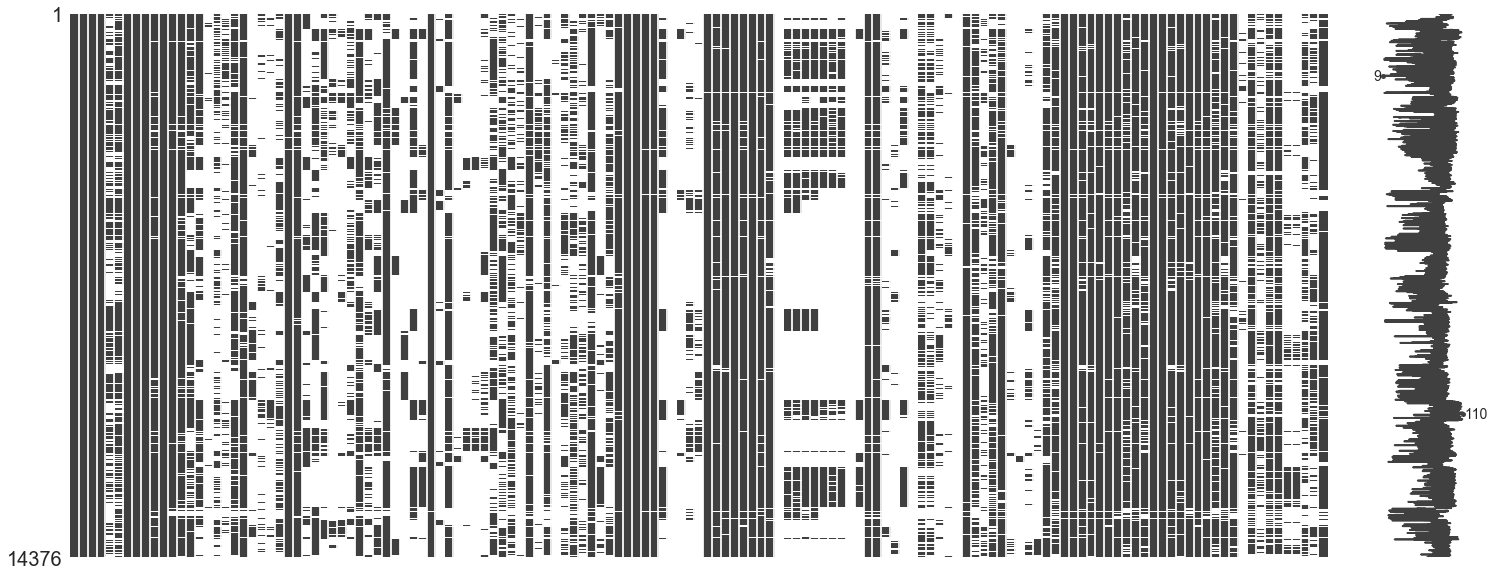

In [9]:
msno.matrix(df)

In [10]:
df = df.dropna(axis=1,thresh=8000, how='all')

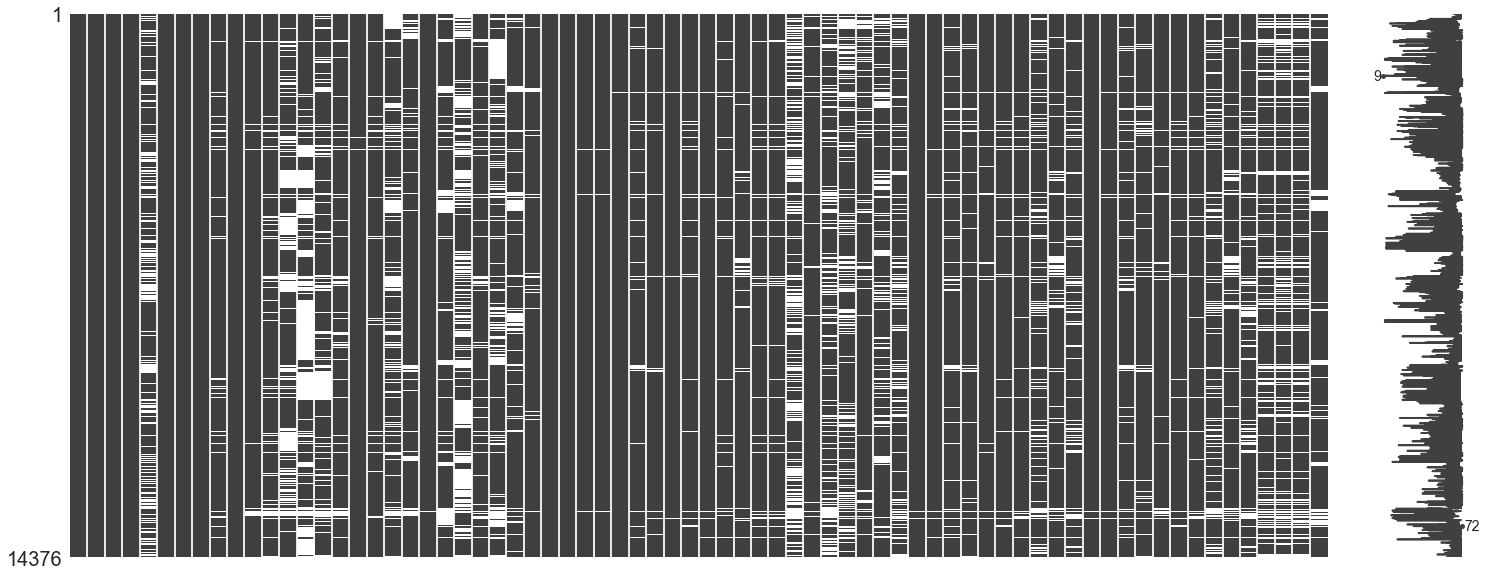

In [11]:
msno.matrix(df)

In [12]:
df.shape

(14376, 72)

In [13]:
df = df.dropna(axis=0,thresh=40, how='all')

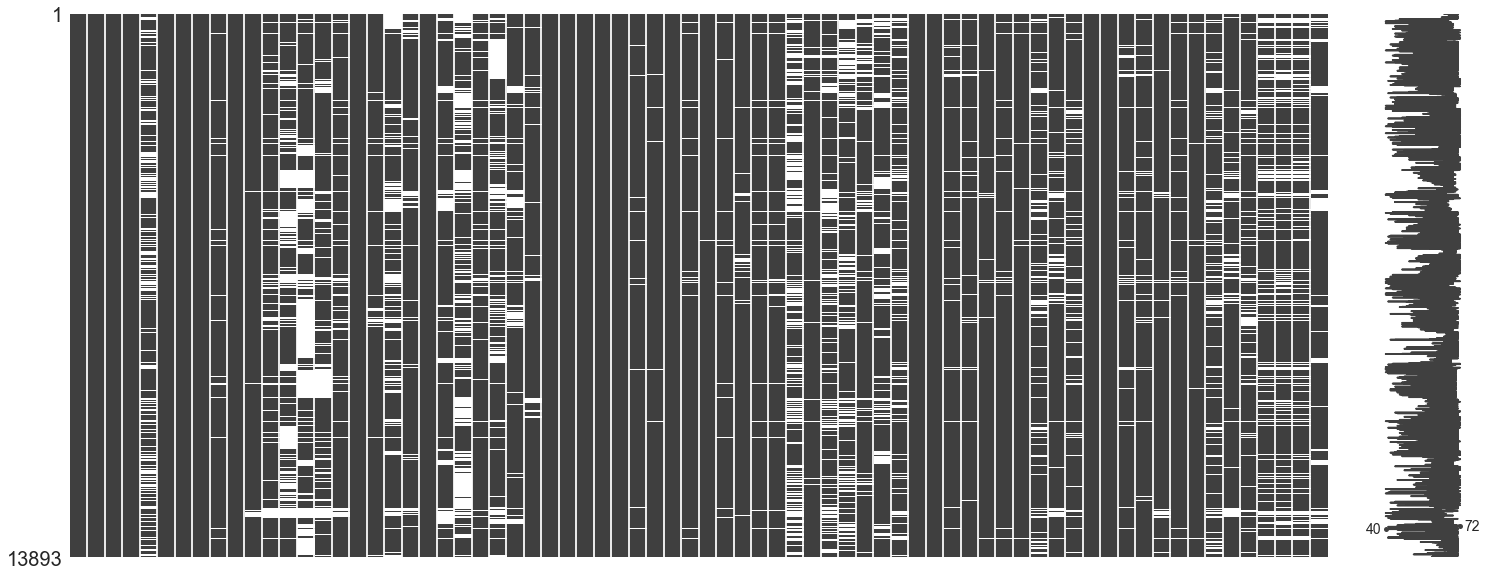

In [14]:
msno.matrix(df)

In [15]:
df.shape

(13893, 72)

In [16]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33', 'TOTALREV', 'TFEDREV', 'C14', 'C15', 'C16', 'C20',
       'C25', 'TSTREV', 'C01', 'C10', 'C13', 'TLOCREV', 'T06', 'D11', 'A09',
       'A13', 'U22', 'U97', 'TOTALEXP', 'TCURELSC', 'TCURINST', 'E13',
       'TCURSSVC', 'E17', 'E07', 'E08', 'E09', 'V40', 'V45', 'V90', 'TCUROTH',
       'E11', 'NONELSEC', 'TCAPOUT', 'F12', 'K09', 'K10', 'Q11', 'I86', 'Z32',
       'Z33', 'V11', 'V13', 'V15', 'V17', 'V21', 'V23', 'V37', 'V29', 'Z34',
       'V10', 'V12', 'V14', 'V16', 'V18', 'V22', 'V24', 'V38', 'V30', '_19H',
       '_31F', '_41F', 'W61'],
      dtype='object')

In [17]:
df.drop("YRDATA", axis=1,inplace=True) #Its all 2015
df.drop("IDCENSUS", axis=1, inplace=True)
df.drop("NCESID", axis=1, inplace=True)

In [18]:
df.shape

(13893, 69)

In [19]:
df.columns

Index(['STATE', 'NAME', 'CONUM', 'CBSA', 'SCHLEV', 'V33', 'TOTALREV',
       'TFEDREV', 'C14', 'C15', 'C16', 'C20', 'C25', 'TSTREV', 'C01', 'C10',
       'C13', 'TLOCREV', 'T06', 'D11', 'A09', 'A13', 'U22', 'U97', 'TOTALEXP',
       'TCURELSC', 'TCURINST', 'E13', 'TCURSSVC', 'E17', 'E07', 'E08', 'E09',
       'V40', 'V45', 'V90', 'TCUROTH', 'E11', 'NONELSEC', 'TCAPOUT', 'F12',
       'K09', 'K10', 'Q11', 'I86', 'Z32', 'Z33', 'V11', 'V13', 'V15', 'V17',
       'V21', 'V23', 'V37', 'V29', 'Z34', 'V10', 'V12', 'V14', 'V16', 'V18',
       'V22', 'V24', 'V38', 'V30', '_19H', '_31F', '_41F', 'W61'],
      dtype='object')

In [20]:
df['CONUM'].describe()

count    13893.000000
mean     29942.695314
std      14801.015121
min       1001.000000
25%      18077.000000
50%      30089.000000
75%      41025.000000
max      56045.000000
Name: CONUM, dtype: float64

In [21]:
df['TOTALEXP'].describe()

count    1.389300e+04
mean     4.679223e+04
std      2.784077e+05
min      1.140000e+02
25%      5.697000e+03
50%      1.473600e+04
75%      3.862400e+04
max      2.747789e+07
Name: TOTALEXP, dtype: float64

In [22]:
df['V33'].describe()

count     13296.000000
mean       3648.478866
std       14960.670154
min           1.000000
25%         422.750000
50%        1133.000000
75%        3011.750000
max      995192.000000
Name: V33, dtype: float64

In [23]:
df['Expenditure/Enrollment'] = df['TOTALEXP']/df['V33']

In [24]:
df['Expenditure/Enrollment'].describe()

count    13296.000000
mean        16.169408
std         43.487351
min          0.546829
25%         10.462589
50%         12.572407
75%         17.129846
max       4451.217391
Name: Expenditure/Enrollment, dtype: float64

In [25]:
df.shape

(13893, 70)

In [26]:
fa_enrollment = pd.DataFrame()

In [27]:
fa_enrollment['V33'] = df['V33'].dropna()

In [30]:
fa_enrollment.describe()

,V33
count,13296.000000
mean,3648.478866
std,14960.670154
min,1.000000
25%,422.750000
50%,1133.000000
75%,3011.750000
max,995192.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022902C9D6A0>]], dtype=object)

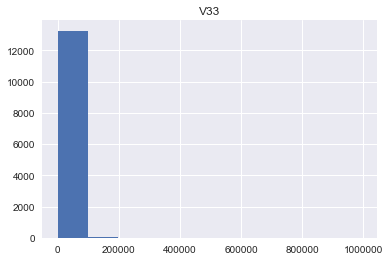

In [29]:
fa_enrollment.hist()

In [103]:
print("Schools greater than 49,999: " ,  fa_enrollment[fa_enrollment['V33'] >= 50000].count())
print("Schools greater than 9,999 and less than 50,000: " ,  fa_enrollment[(fa_enrollment['V33'] < 50000) & (fa_enrollment['V33'] >= 10000)].count())
print("Schools greater than 1,999 and less than 10,000: " ,  fa_enrollment[(fa_enrollment['V33'] < 10000) & (fa_enrollment['V33'] >= 2000)].count())
print("Schools greater than 999 and less than 2000): ", fa_enrollment[(fa_enrollment['V33'] < 2000) & (fa_enrollment['V33'] >= 1000)].count())
print("Schools greater than 499 and less than 1000): ", fa_enrollment[(fa_enrollment['V33'] < 1000) & (fa_enrollment['V33'] >= 500)].count())
print("Schools greater than 99 and less than 500): ", fa_enrollment[(fa_enrollment['V33'] < 500) & (fa_enrollment['V33'] >= 100)].count())
print("Schools less than 100): ", fa_enrollment[(fa_enrollment['V33'] < 100)].count())

Schools greater than 49,999:  V33    93
dtype: int64
Schools greater than 9,999 and less than 50,000:  V33    800
dtype: int64
Schools greater than 1,999 and less than 10,000:  V33    3712
dtype: int64
Schools greater than 999 and less than 2000):  V33    2512
dtype: int64
Schools greater than 499 and less than 1000):  V33    2358
dtype: int64
Schools greater than 99 and less than 500):  V33    3159
dtype: int64
Schools less than 100):  V33    662
dtype: int64


In [35]:
def group_pop(x): 
    if x >= 50000:
        return "Greater than 50,000"
    elif x < 50000 and x >= 10000:
        return "Greater than 9,999 and less than 10,000"
    elif x < 10000 and x >= 2000:
        return "Greater than 1999 and less than 10,000"
    elif x < 2000 and x >= 999:
        return "Greater than 999 and less than 2000"
    elif x < 1000 and x >= 499:
        return "Greater than 499 and less than 1000"
    elif x < 500 and x >= 99:
        return "Greater than 99 and less than 500"
    else:
        return "Less than 100"
    
df["Enrollment size"] = df['V33'].map(group_pop)
df.head()

,STATE,NAME,CONUM,CBSA,SCHLEV,V33,TOTALREV,TFEDREV,C14,C15,...,V22,V24,V38,V30,_19H,_31F,_41F,W61,Expenditure/Enrollment,Enrollment size
0,1,AUTAUGA COUNTY SCHOOL DISTRICT,1001,33860,3,9664.0,79665.0,7574.0,1791.0,2179.0,...,705.0,1672.0,122.0,1126.0,49431.0,2992.0,63042.0,8617.0,7.871378,"Greater than 1999 and less than 10,000"
1,1,BALDWIN COUNTY SCHOOL DISTRICT,1003,19300,3,30596.0,330317.0,23602.0,5729.0,7207.0,...,3787.0,3219.0,744.0,2924.0,337160.0,13027.0,423220.0,71370.0,9.709864,"Greater than 9,999 and less than 10,000"
2,1,BARBOUR COUNTY SCHOOL DISTRICT,1005,NaN,3,925.0,10519.0,2518.0,1279.0,323.0,...,68.0,196.0,20.0,134.0,8024.0,304.0,7720.0,646.0,11.150270,Greater than 499 and less than 1000
3,1,EUFAULA CITY SCHOOL DISTRICT,1005,NaN,3,2829.0,26076.0,3374.0,1035.0,596.0,...,190.0,176.0,141.0,346.0,NaN,NaN,NaN,7478.0,9.049841,"Greater than 1999 and less than 10,000"
4,1,BIBB COUNTY SCHOOL DISTRICT,1007,13820,3,3357.0,31825.0,3586.0,856.0,980.0,...,223.0,653.0,119.0,474.0,22155.0,1190.0,20965.0,5400.0,9.321716,"Greater than 1999 and less than 10,000"


12814


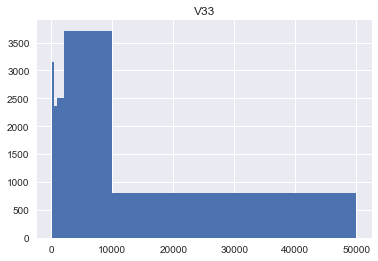

In [107]:
bins = [100, 500, 1000, 2000, 10000, 50000]
fa_enrollment.hist(bins = bins)
print(93 + 800 + 3712 + 2512 + 2538 + 3159)

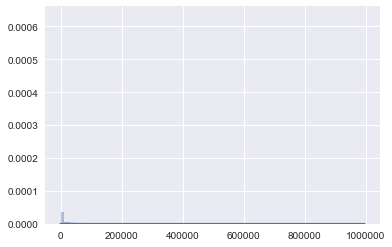

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB60DD9E10>]], dtype=object)

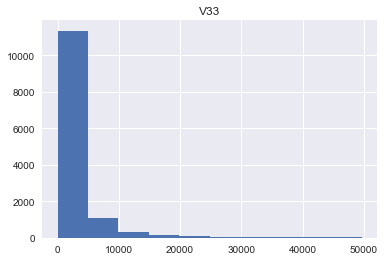

In [58]:
fa_enrollment = fa_enrollment[fa_enrollment['V33'] < 50000]
fa_enrollment.describe()
fa_enrollment.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB60EE6A20>]], dtype=object)

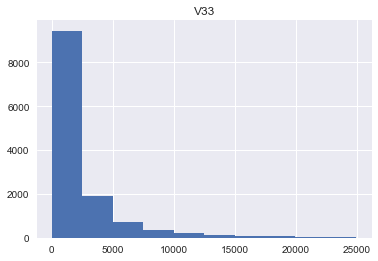

In [59]:
fa_enrollment = fa_enrollment[fa_enrollment['V33'] < 25000]
fa_enrollment.describe()
fa_enrollment.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB60FE87F0>]], dtype=object)

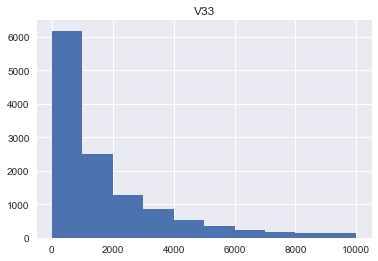

In [60]:
fa_enrollment = fa_enrollment[fa_enrollment['V33'] < 10000]
fa_enrollment.describe()
fa_enrollment.hist()